**Note: This Jupyter notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting code or results.**

# Exploring Dandiset 001176: Cortical acetylcholine dynamics are predicted by cholinergic axon activity and behavior state

This dataset contains in-vivo two-photon imaging data of acetylcholine (ACh) sensors and GCaMP expressing axons during spontaneous behavioral state changes. It features recordings of ACh activity, axon activity, and pupil size.

**Keywords:** acetylcholine, brain states, two-photon imaging, neuromodulator, Axon imaging

License: CC-BY-4.0  
Contributors: NIH, Reimer, Neyhart  
Citation: Reimer, Jacob; Neyhart, Erin (2025). DANDI Archive. https://dandiarchive.org/dandiset/001176/draft

---

This notebook demonstrates how to explore Dandiset 001176, load example NWB files hosted in the DANDI archive, and visualize some eye and pupil tracking data.
It does **not** perform full scientific analysis, only initial exploratory steps.

## Setup: Import packages

In [1]:
import pynwb
import remfile
import h5py
import matplotlib.pyplot as plt
import numpy as np
from dandi.dandiapi import DandiAPIClient

## List all assets in Dandiset 001176 with the DANDI API

In [2]:
client = DandiAPIClient()
dandiset = client.get_dandiset('001176', 'draft')
assets = list(dandiset.get_assets())
print(f"Number of assets: {len(assets)}")
for asset in assets[:5]:
    print(f"- size={asset.size} bytes | path: {asset.path}")

Number of assets: 132
- size=7766954 bytes | path: sub-16/sub-16_ses-16-4-2-Ach-M1_behavior+ophys.nwb
- size=5001950 bytes | path: sub-18/sub-18_ses-18-1-2-Ach-M1_behavior+ophys.nwb
- size=4311973 bytes | path: sub-16/sub-16_ses-16-1-2-Ach-M1_behavior+ophys.nwb
- size=7995712 bytes | path: sub-16/sub-16_ses-16-4-1-Ach-M1_behavior+ophys.nwb
- size=7880355 bytes | path: sub-16/sub-16_ses-16-3-1-Ach-M1_behavior+ophys.nwb


## Select an example NWB file for demonstration

Here we select a smaller-size file:
`sub-22713/sub-22713_ses-22713-2-1-Ach-V1_behavior+ophys.nwb`

In [3]:
nwb_url = "https://api.dandiarchive.org/api/assets/be84b6ff-7016-4ed8-af63-aa0e07c02530/download/"

## Load the NWB file using PyNWB + remfile

In [4]:
file = remfile.File(nwb_url)
h5file = h5py.File(file)
io = pynwb.NWBHDF5IO(file=h5file, load_namespaces=True)
nwb = io.read()

## Explore EyeTracking data: eye position (x,y)

The `EyeTracking` module provides x and y pixel positions of the pupil over time.

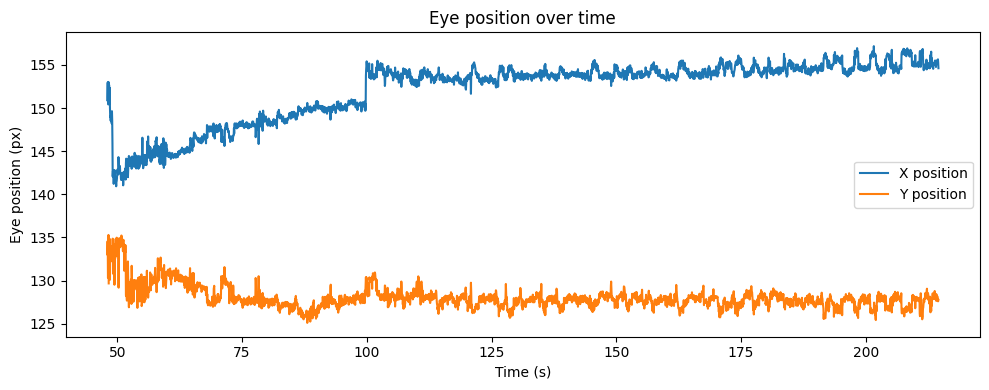

In [5]:
eye_pos_data = nwb.acquisition['EyeTracking'].spatial_series['eye_position'].data[:]
eye_pos_timestamps = nwb.acquisition['EyeTracking'].spatial_series['eye_position'].timestamps[:]

plt.figure(figsize=(10, 4))
plt.plot(eye_pos_timestamps, eye_pos_data[:,0], label='X position')
plt.plot(eye_pos_timestamps, eye_pos_data[:,1], label='Y position')
plt.xlabel('Time (s)')
plt.ylabel('Eye position (px)')
plt.title('Eye position over time')
plt.legend()
plt.tight_layout()
plt.show()

## Explore PupilTracking data: pupil radius

The `PupilTracking` module contains the pupil radius estimate over time.

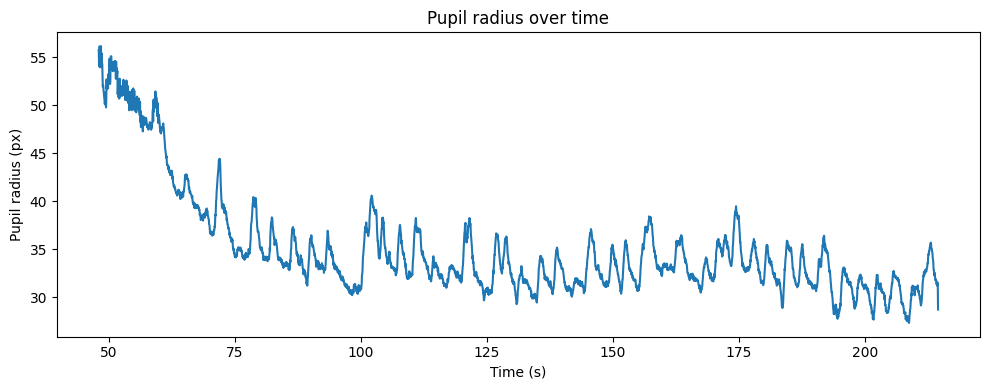

In [6]:
pupil_radius = nwb.acquisition['PupilTracking'].time_series['pupil_raw_radius'].data[:]
pupil_timestamps = nwb.acquisition['PupilTracking'].time_series['pupil_raw_radius'].timestamps[:]

plt.figure(figsize=(10, 4))
plt.plot(pupil_timestamps, pupil_radius)
plt.xlabel('Time (s)')
plt.ylabel('Pupil radius (px)')
plt.title('Pupil radius over time')
plt.tight_layout()
plt.show()

---
# Summary

This notebook showed how to:
- Connect to DANDI Archive and list dataset assets
- Load an example NWB file remotely
- Extract and visualize eye position and pupil size signals

Researchers are encouraged to explore additional NWB files and data types, such as fluorescence imaging and behavioral variables, and develop more advanced analyses based on their needs.

In [7]:
io.close()
file.close()